# ODE Model of Skin Microbiome

companion Biocham notebook associated to the article

### Stability versus Meta-stability in a Model of Skin Microbiome

Eléa Thibault Greugny(1,2), Georgios N. Stamatas(1), and François Fages(2)

1 Johnson & Johnson Santé Beauté France, Issy-les-Moulineaux, France

2 Inria Saclay, Lifeware Team, Palaiseau, France

In [1]:
clear_model.
set_units(time, hours).
set_units(substance, CFU).
set_units(volume, ASU).

In [2]:
da*Ab for Ab=>_.
kc*Sc for Sc=>Ab+Sc.
rsp*Sp for Sp=>2*Sp.
rsc*Sc for Sc=>2*Sc.
rsp*Sp^2/Ksp for Sp=>_.
rsc*Sc^2/Ksc for Sc=>_.
dspb*Ab*Sp/(Cab+Ab) for Ab+Sp=>Ab.
dsph*Ah*Sp/(Cah+Ah) for Sp=>_.
dsc*Sp*Sc/(C1+Sp) for Sp+Sc=>Sp.

In [3]:
parameter(Ksc=4e8,Ksp=3e9,Cab=0.16,Cah=8).
function dsc = rsc*((3*C1/4e9) + 3/4).
function dspb = 5*rsp/4 .
function dsph = 2*rsp.
function da = 1e8*kc*(56 + 31*Ah)/(2.56*(4-Ah)).

In [4]:
present(Sp,sp0).
present(Sc,sc0).
present(Ab,0).

In [5]:
list_model.


Ab*da for Ab=>_.
Sc*kc for Sc=>Ab+Sc.
Sp*rsp for Sp=>2*Sp.
Sc*rsc for Sc=>2*Sc.
Sp^2/Ksp*rsp for Sp=>_.
Sc^2/Ksc*rsc for Sc=>_.
Ab*Sp*dspb/(Ab+Cab) for Ab+Sp=>Ab.
Ah*Sp*dsph/(Ah+Cah) for Sp=>_.
Sc*Sp*dsc/(C1+Sp) for Sc+Sp=>Sp.
initial_state(Sp=sp0).
initial_state(Sc=sc0).
initial_state(Ab=0).
parameter(
  Ksc = 400000000.0,
  Ksp = 3000000000.0,
  Cab = 0.16,
  Cah = 8
).
function(
  dsc = rsc*(3*C1/4000000000.0+3/4),
  dspb = 5*rsp/4,
  dsph = 2*rsp,
  da = 100000000.0*kc*(56+31*Ah)/(2.56*(4-Ah))
).


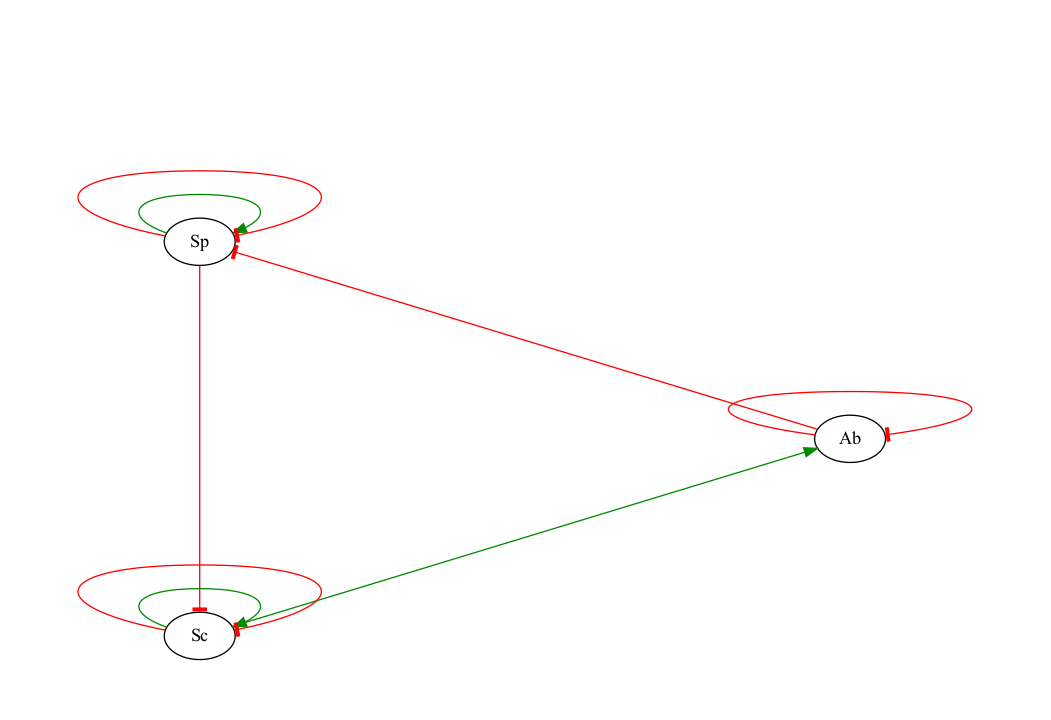

In [6]:
parameter(sp0 = 1e3, sc0 = 1e5).
draw_influences.

# Reproducing Kohda et al. (2021) coculture experimental data
Parameter values reproducing the experimental results showing
* stabilization at 40-50 hours of Sc=1e8 and Sp=1e9 
* with initial conditions Sp(0)=1e3 and Sc(0)=1e5

In [7]:
option(time:50).
function normSc = Sc*1e-8.
function normSp = Sp*1e-9.

parameter(sp0 = 1e3, sc0 = 1e5).

In [8]:
parameter(rsc=0.5,rsp=1,C1=5e6,kc=0.01,Ah=1.5).

In [9]:
option(show:{Sp, Sc}).
numerical_simulation.
plot.



2022-06-17 07:22:57.297 xcodebuild[2032:10721] Requested but did not find extension point with identifier Xcode.IDEKit.ExtensionSentinelHostApplications for extension Xcode.DebuggerFoundation.AppExtensionHosts.watchOS of plug-in com.apple.dt.IDEWatchSupportCore
2022-06-17 07:22:57.298 xcodebuild[2032:10721] Requested but did not find extension point with identifier Xcode.IDEKit.ExtensionPointIdentifierToBundleIdentifier for extension Xcode.DebuggerFoundation.AppExtensionToBundleIdentifierMap.watchOS of plug-in com.apple.dt.IDEWatchSupportCore



In [10]:
validity_domain(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2)))).


x1=0.996937/\y1=0.990333/\x2=0.999163/\y2=1.00058


In [11]:
satisfaction_degree(
    F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))),
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1]
).


 
 
 
0.989911


### Robustness of the result with respect to variations of rsc, kc, Ah parameter values 
with coefficient of variation 0.1, 1, 10.
(robustness as mean satisfaction degree of the behaviour specification).

In [12]:
validity_domain(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2)))).


x1=0.996937/\y1=0.990333/\x2=0.999163/\y2=1.00058


In [13]:
satisfaction_degree(
    F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))),
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1]
).


 
 
 
0.989911


In [14]:
seed(1).
robustness(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))), 
    [rsc, kc, Ah], 
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1],
    robustness_coeff_var:0.1).



 
 
 
Time: 7.62 s
Robustness degree: 0.873042


In [15]:
seed(1).
robustness(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))), 
    [rsc, kc, Ah], 
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1],
    robustness_coeff_var:1).



 
 
 
Time: 6.14 s
Robustness degree: 0.416083


In [16]:
seed(1).
robustness(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))), 
    [rsc, kc, Ah], 
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1],
    robustness_coeff_var:10).



 
 
 
Time: 5.728 s
Robustness degree: 0.771204


In [17]:
seed(1).
robustness(F(Time==40 /\ normSc = x1 /\ normSp = y1 /\ F(G(normSc = x2 /\ normSp = y2))), 
    [rsc, kc, Ah], 
    [x1 -> 1, x2 -> 1, y1 -> 1, y2 -> 1],
    robustness_coeff_var:100).



 
 
 
Time: 6.674 s
Robustness degree: 0.327892


# Conditions of healthy microbiome balance
Parameter values reproducing a healthy skin microbiome
* stabilizing at 40-50 hours with inverse balance with order of magnitude Sc=1e8, Sp=1e5
* starting from Sp(0)=1e3 and Sc(0)=1e5

In [18]:
parameter(sp0 =1e3, sc0=1e5).
function safeSc = Sc*1e-8.
function safeSp = Sp*1e-5.

In [19]:
parameter(rsc=0.5,rsp=0.5,C1=2e8,kc=0.01,Ah=3).

In [20]:
list_parameters.


parameter(
  Ksc = 400000000.0,
  Ksp = 3000000000.0,
  Cab = 0.16,
  Cah = 8,
  sp0 = 1000.0,
  sc0 = 100000.0,
  rsc = 0.5,
  rsp = 0.5,
  C1 = 200000000.0,
  kc = 0.01,
  Ah = 3
).


In [21]:
numerical_simulation.
plot.

In [22]:
validity_domain(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2)))).


x1=3.99838/\y1=0.947149/\x2=3.99763/\y2=1.42024


In [23]:

satisfaction_degree(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4]).


 
0.946372


### Sensitivity to parameter values

In [24]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [rsc],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 0.2).


 
Time: 5.233 s
Robustness degree: 0.594962


In [25]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [rsp],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 0.2).


 
Time: 5.45 s
Robustness degree: 0.524697


In [26]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [C1],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 10).


 
Time: 5.117 s
Robustness degree: 0.946408


In [27]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [kc],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 1.0).


 
Time: 5.284 s
Robustness degree: 0.946185


In [28]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [Ah],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 0.2).


 
Time: 4.983 s
Robustness degree: 0.476586


In [29]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [sp0],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 10).


 
Time: 5.516 s
Robustness degree: 0.161896


In [30]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [sc0],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 10).


 
Time: 4.57 s
Robustness degree: 0.567383


### Global sensitivity to some parameter pairs

In [31]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [rsc,rsp],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 0.2).


 
Time: 3.702 s
Robustness degree: 0.519691


In [32]:
robustness(F(Time==40 /\ safeSc = x1 /\ safeSp = y1 /\ F(G(safeSc = x2 /\ safeSp = y2))),
    [sc0,sp0],[x1 -> 4, x2 -> 4, y1 -> 1, y2 -> 1.4], robustness_coeff_var: 10).


 
Time: 4.1 s
Robustness degree: 0.340808


# Metastability Revealed on a Long Time Scale
The previous seemingly stable state on the 50 hours time scale of the experiments is in fact a metastable state which is reversed after 200 hours.

In [33]:
option(time:500).

In [34]:
numerical_simulation.
plot.

In [35]:
validity_domain(F(Time=t /\ Sp==Sc)).


t=209.522


This phenomenon appears above a threshold value for Ah>2.5 on a longer time scale

In [36]:
parameter(Ah=2.5).
numerical_simulation(time:1e5).
plot.

In [37]:
validity_domain(F(Time=t /\ Sp==Sc)).


t=6067.17


In [38]:
parameter(Ah=2.49).
numerical_simulation(time:1e10).
plot.

# Comparing 2 pH conditions on healthy condition

## Low pH (around 5) - healthy skin

In [39]:
option(time:50).
parameter(rsc=0.5,rsp=0.3,C1=2e8,kc=0.01,Ah=3).
parameter(sc0=1e5, sp0=1e3).

In [40]:
numerical_simulation.
plot.
satisfaction_degree(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),[u1 -> 10, u2 -> 10]).




20447.400000


In [10]:
%timeout 600000

Timeout set to 600000

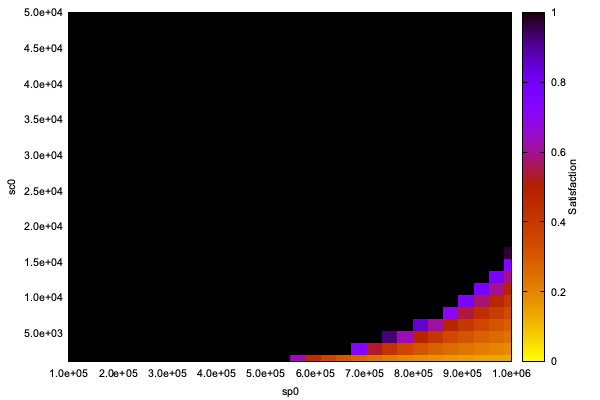


 
Time: 3178.45 s
Mean satisfaction (robustness): 0.600085, standard deviation: 0.654062
Maximum satisfaction: 1.000000
Best solutions found with 100000.000000<=sp0<=1000000.000000, 1000.000000<=sc0<=50000.000000


In [42]:
scan_parameters(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),
    (1e5 <= sp0 <= 1e6), (1e3 <= sc0 <= 5e4), [u1 -> 10, u2 -> 10], resolution: 30).

## Higher pH (around 6.5) - compromised skin

In [43]:
parameter(rsc=0.9,rsp=1.3,C1=2e8,kc=0.01,Ah=3).
parameter(sc0=1e5, sp0=1e3).

In [44]:
numerical_simulation.
plot.
satisfaction_degree(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),[u1 -> 10, u2 -> 10]).




17.876800


In [45]:
search_parameters(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),
    [1e4 <= sp0 <= 1e6, 1e3 <= sc0 <= 1e8], [u1 -> 10, u2 -> 10], cmaes_log_normal:yes,
    cmaes_init_center: yes).


 
 
Time: 3.227 s
Stopping reason: Fitness: function value -9.38e-01 <= stopFitness (1.00e-04)
Best satisfaction degree: 16.005285
[0] parameter(sp0=22778.239766146624)
[1] parameter(sc0=29330926.381110094)


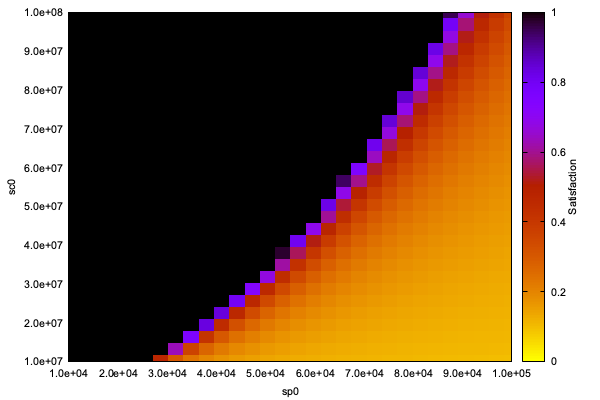


 
Time: 2939.596 s
Mean satisfaction (robustness): 0.389989, standard deviation: 0.602861
Maximum satisfaction: 1.000000
Best solutions found with 10000.000000<=sp0<=84482.758621, 10000000.000000<=sc0<=100000000.000000


In [46]:
scan_parameters(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),
    (1e4 <= sp0 <= 1e5), (1e7 <= sc0 <= 1e8), [u1 -> 10, u2 -> 10], resolution: 30).

# Comparing AMP production level by the skin

## Low production of AMPs (Ah = 0.5)

In [11]:
parameter(rsc=0.5,rsp=0.5,C1=2e8,kc=0.01,Ah=0.5).
parameter(sc0=1e5, sp0=1e3).

In [12]:
numerical_simulation.
plot.
satisfaction_degree(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),[u1 -> 10, u2 -> 10]).




2138.560000


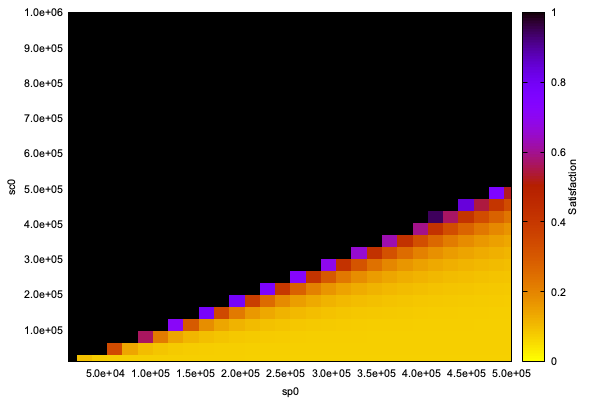


 
Time: 3267.186 s
Mean satisfaction (robustness): 0.477428, standard deviation: 0.646201
Maximum satisfaction: 1.000000
Best solutions found with 10000.000000<=sp0<=500000.000000, 10000.000000<=sc0<=1000000.000000


In [13]:
scan_parameters(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),
    (1e4 <= sp0 <= 5e5), (1e4 <= sc0 <= 1e6), [u1 -> 10, u2 -> 10], resolution: 30).

## High production of AMPs (Ah = 3)

In [14]:
parameter(rsc=0.5,rsp=0.5,C1=2e8,kc=0.01,Ah=3).
parameter(sp0=1e3,sc0=1e5).

In [15]:
numerical_simulation.
plot.
satisfaction_degree(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),[u1 -> 10, u2 -> 10]).




2805.760000


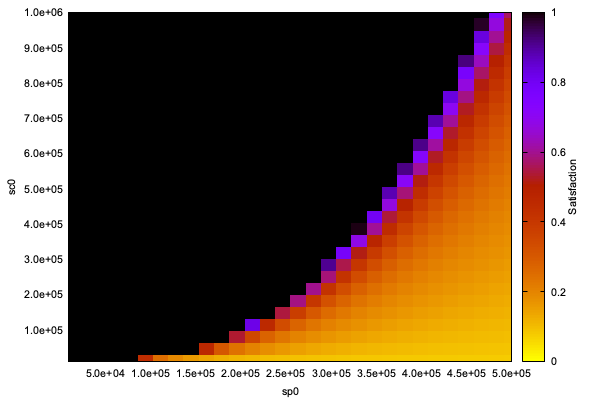


 
Time: 3204.896 s
Mean satisfaction (robustness): 0.449891, standard deviation: 0.626255
Maximum satisfaction: 1.000000
Best solutions found with 10000.000000<=sp0<=466206.896552, 10000.000000<=sc0<=1000000.000000


In [16]:
scan_parameters(F(Time==40 /\ (Sc > u1*Sp) /\ F(G(Sc > u2*Sp))),
    (1e4 <= sp0 <= 5e5), (1e4 <= sc0 <= 1e6), [u1 -> 10, u2 -> 10], resolution: 30).